In [2]:
!pip install seaborn

In [3]:
!pip install matplotlib

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

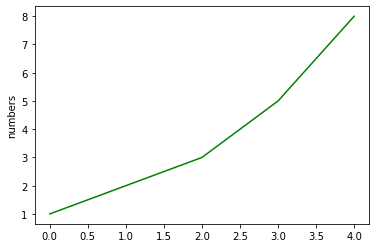

In [5]:
plt.plot([1,2,3,5,8],'g')
plt.ylabel('numbers')
# plt.slabel('o to 4')
plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

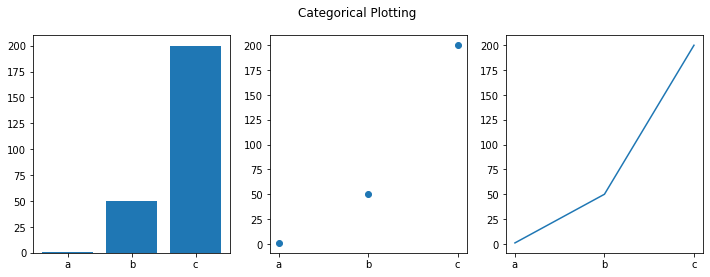

In [6]:
alphabet = ['a','b','c']
values = [1, 50 , 200]

plt.figure(figsize = (12, 4)) #

plt.subplot(131)
plt.bar(alphabet, values)
plt.subplot(1,3,2)
plt.scatter(alphabet, values)
plt.subplot(133)
plt.plot(alphabet, values)
plt.suptitle('Categorical Plotting')

In [7]:
data = pd.read_csv("BIPA_data.csv")

In [8]:
data

,Unnamed: 0,gameId,createDate,tierRank,position,teamId,summonerId,championId,result,level,...,totalDamageTaken,neutralMinionsKilledEnemyJungle,neutralMinionsKilledTeamJungle,visionScore,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,lane,gameLength,version
0,0,5383880006,2021-08-11 06:59:31,P318,S,200,3210877,99,WIN,10,...,3602,0,0,11,2830,2181,2181,NONE,972,11.16.390.1945
1,1,5383880006,2021-08-11 06:59:31,P466,S,100,7550211,35,LOSE,8,...,5077,0,2,24,2013,0,0,NONE,972,11.16.390.1945
2,2,5383880006,2021-08-11 06:59:31,P329,M,200,9306696,266,WIN,11,...,11029,0,0,15,6158,585,585,NONE,972,11.16.390.1945
3,3,5383880006,2021-08-11 06:59:31,P461,T,200,20281103,92,WIN,11,...,9944,0,0,10,7615,2318,2318,NONE,972,11.16.390.1945
4,4,5383880006,2021-08-11 06:59:31,P30,A,200,26082075,22,WIN,10,...,6387,0,0,13,3218,2370,2370,NONE,972,11.16.390.1945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999995,5384659633,2021-08-11 17:20:44,S146,S,100,21560397,53,WIN,15,...,32961,0,0,63,34725,1978,126,BOTTOM,2379,11.16.390.1945
999996,999996,5384659633,2021-08-11 17:20:44,G442,M,100,46320531,166,WIN,18,...,24674,1,16,16,21371,8406,7042,MIDDLE,2379,11.16.390.1945
999997,999997,5384659633,2021-08-11 17:20:44,G418,J,200,64820251,64,LOSE,17,...,45911,6,68,22,62426,20292,454,JUNGLE,2379,11.16.390.1945
999998,999998,5384659633,2021-08-11 17:20:44,S178,A,100,72310857,81,WIN,17,...,28187,8,9,17,19664,11090,1062,BOTTOM,2379,11.16.390.1945


In [9]:
data = pd.read_csv("BIPA_data.csv",index_col = 0)

In [10]:
datal_10 = data[data['championId'].isin(range(0,10))]
groupl_10 = datal_10.groupby("championId", as_index = False).mean()

<BarContainer object of 9 artists>

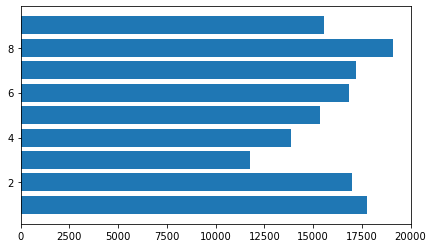

In [11]:
#figure는 캔버스, ax는 그림의 여러부분
fig, ax = plt.subplots(figsize = (7, 4))
ax.barh(groupl_10['championId'],
        groupl_10['totalDamageDealtToChampions'])

In [12]:
import requests
champ_ver = requests.get('https://ddragon.leagueoflegends.com/realms/na.json').json()['n']['champion']
championJsonURL = 'http://ddragon.leagueoflegends.com/cdn/'+champ_ver+'/data/en_US/champion.json'
request = requests.get(championJsonURL)
champion_data=request.json()
champion_data.keys()
champion_dict = {}
for c_name in champion_data['data'].keys() :
    champion_dict[int(champion_data['data'][c_name]['key'])]=c_name
champion_dict.keys()
champion = pd.DataFrame.from_dict(champion_dict, orient = 'index', columns = ['champion'])

In [13]:
#championId, data merge

In [14]:
groupl_10 = pd.merge(groupl_10, champion, left_on = 'championId', right_index = True)

In [15]:
groupl_10

,championId,gameId,teamId,summonerId,level,championsKilled,numDeaths,assists,neutralMinionsKilled,turretsKilled,...,totalDamageDealt,totalDamageTaken,neutralMinionsKilledEnemyJungle,neutralMinionsKilledTeamJungle,visionScore,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,gameLength,champion
0,1,5.384407e+09,149.863574,4.828111e+07,13.522510,5.843793,5.648704,7.482265,5.060027,0.684175,...,79020.755116,13873.920873,0.869031,3.095498,23.654843,8224.886085,3825.978854,1956.866985,1644.729195,Annie
1,2,5.384392e+09,148.995149,5.375949e+07,13.733888,6.730423,5.649342,6.315315,98.355509,0.970201,...,140331.489951,30216.665974,8.994456,65.050589,19.574498,26459.150381,18985.893278,1788.160776,1635.169785,Olaf
2,3,5.384396e+09,149.838319,5.641768e+07,12.682498,3.223727,5.536176,10.374091,2.225748,0.415319,...,65968.596200,18422.628335,0.378941,1.060226,28.201091,21981.946443,2720.986661,1188.933508,1622.791027,Galio
3,4,5.384395e+09,150.449371,4.589860e+07,13.651288,4.387358,5.648292,7.768424,8.230677,1.010785,...,108823.763032,17346.380467,1.172858,5.031756,18.112942,8392.594368,5560.650090,3059.980827,1590.137507,TwistedFate
4,5,5.384395e+09,150.382831,4.981885e+07,13.369142,6.084803,5.800812,6.957309,103.541415,0.819374,...,129307.661833,28847.416589,8.319606,69.758121,20.622390,19254.804176,17998.159397,1483.745244,1612.376798,XinZhao
5,6,5.384378e+09,149.351585,4.985643e+07,14.248559,5.936599,5.662824,4.972622,14.265850,1.667867,...,129441.371758,21756.476945,2.865994,6.420029,18.207493,24718.951729,9548.915706,4071.570605,1637.839337,Urgot
6,7,5.384404e+09,149.812433,5.053182e+07,13.759825,6.782422,4.569310,6.266166,5.830922,0.622544,...,79998.176402,18339.237138,1.080475,3.568149,20.033583,8599.405681,3188.190872,1811.963469,1629.338246,Leblanc
7,8,5.384376e+09,150.943732,5.599144e+07,14.145833,5.597578,5.204772,5.246617,6.983796,0.873041,...,116093.556090,23501.713497,1.582265,3.392806,15.436610,11059.194979,5358.603276,2471.168803,1609.393697,Vladimir
8,9,5.384376e+09,150.058343,4.084821e+07,13.368145,5.127771,5.380688,8.717036,98.850350,0.443116,...,120797.366103,24352.407235,6.529463,70.018670,48.835764,13716.184072,13164.863769,725.270128,1647.637106,Fiddlesticks


<BarContainer object of 9 artists>

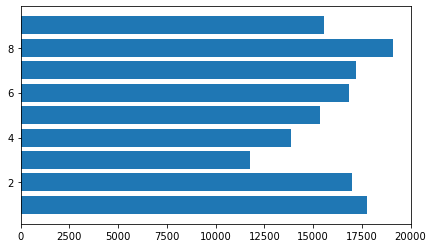

In [16]:
#y축 이름 변경
fig, ax = plt.subplots(figsize = (7, 4))
ax.barh(groupl_10['championId'], groupl_10['totalDamageDealtToChampions'])

<AxesSubplot:>

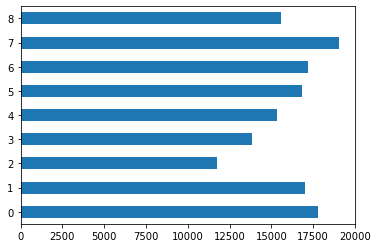

In [17]:
#dataframe에서 바로 그리기
groupl_10['totalDamageDealtToChampions'].plot(kind = 'barh')

<ipython-input-18-7d1a359692cb>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  groupl_10.indes = groupl_10.champion


<AxesSubplot:>

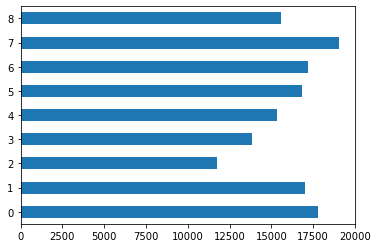

In [18]:
#인덱스 변경
groupl_10.indes = groupl_10.champion
groupl_10['totalDamageDealtToChampions'].plot(kind = 'barh')

<BarContainer object of 9 artists>

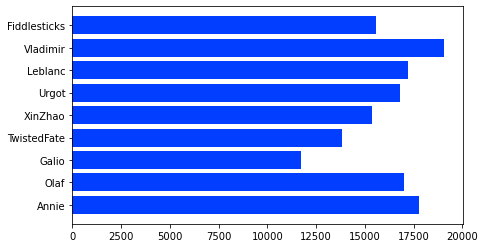

In [19]:
#색상변경
sns.set_palette('bright')
fig, ax = plt.subplots(figsize = (7,4))
ax.barh(groupl_10['champion'], groupl_10['totalDamageDealtToChampions'])

<BarContainer object of 9 artists>

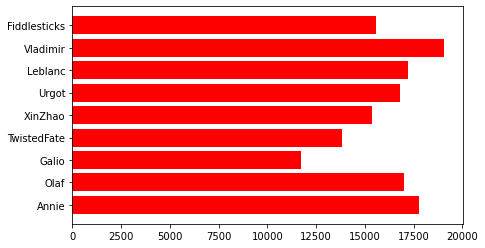

In [20]:
#색상변경(하나만)
sns.set_palette('bright')
fig, ax = plt.subplots(figsize = (7,4))
ax.barh(groupl_10['champion'], groupl_10['totalDamageDealtToChampions'], color = 'red')

Text(0.5, 1.0, 'Avg Champion Damage')

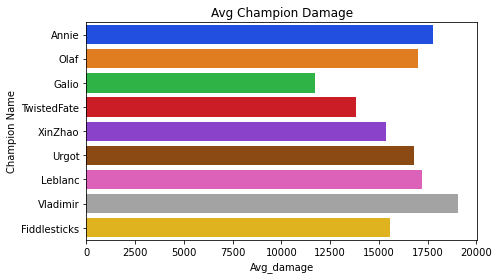

In [21]:
# xlabel, ylabel, title
fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(data = groupl_10, x = 'totalDamageDealtToChampions',
            y = 'champion')

ax.set_xlabel('Avg_damage')
ax.set_ylabel('Champion Name')
ax.set_title('Avg Champion Damage')

Text(0.5, 1.0, 'Avg Champion Damage')

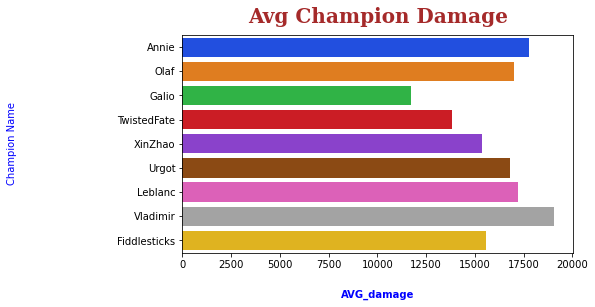

In [22]:
#font 변경
font_label = {
    'color' : 'blue',
    'weight' : 'bold'
}



font_title = {
    'family' : 'serif',
    'size' : 20,
    #'backgroundclord : 'black',
    'color' : 'brown', 
    'weight' : 'bold' , 
    'verticalalignment' : 'baseline', 
    'horizontalalignment' : 'center'
    
}


fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = groupl_10, x = 'totalDamageDealtToChampions',
           y = 'champion')

ax.set_xlabel('AVG_damage', fontdict = font_label, labelpad = 20)
ax.set_ylabel('Champion Name', color = 'blue' , labelpad = 100)
ax.set_title('Avg Champion Damage', fontdict = font_title, pad = 12)



Text(0.5, 1.0, 'Avg Champion Damage')

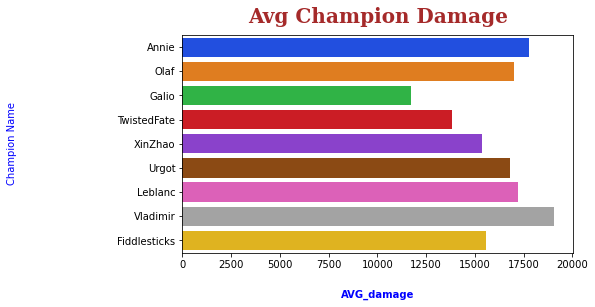

In [23]:
#font 변경
font_label = {
    'color' : 'blue',
    'weight' : 'bold'
}



font_title = {
    'family' : 'serif',
    'size' : 20,
    #'backgroundclord : 'black',
    'color' : 'brown', 
    'weight' : 'bold' , 
    'verticalalignment' : 'baseline', 
    'horizontalalignment' : 'center'
    
}


fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = groupl_10, x = 'totalDamageDealtToChampions',
           y = 'champion')

#

ax.set_xlim = (10000, 20000)

# labelpad = distance between label and group


ax.set_xlabel('AVG_damage', fontdict = font_label, labelpad = 20)
ax.set_ylabel('Champion Name', color = 'blue' , labelpad = 100)
ax.set_title('Avg Champion Damage', fontdict = font_title, pad = 12)



Text(0.5, 1.0, 'Avg Champion Damage')

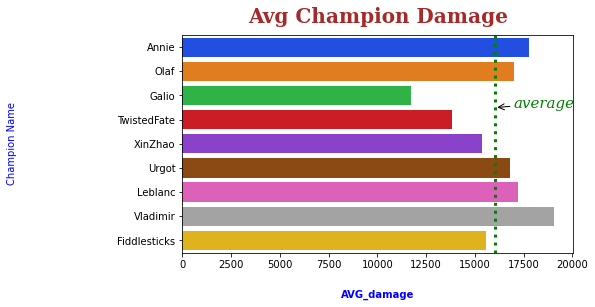

In [24]:
#font 변경
font_label = {
    'color' : 'blue',
    'weight' : 'bold'
}



font_title = {
    'family' : 'serif',
    'size' : 20,
    #'backgroundclord : 'black',
    'color' : 'brown', 
    'weight' : 'bold' , 
    'verticalalignment' : 'baseline', 
    'horizontalalignment' : 'center'
    
}


fig, ax = plt.subplots(figsize = (7,4))
sns.barplot(data = groupl_10, x = 'totalDamageDealtToChampions',
           y = 'champion')

#

ax.set_xlim = (10000, 20000)

# labelpad = distance between label and group



###  한계선 설정

damage_mean = groupl_10['totalDamageDealtToChampions'].mean()
ax.axvline(damage_mean, ls = 'dotted', lw = 3, color = 'green')
arrowprops = {
    'arrowstyle' : '->'
    
}

ax.annotate("average", (damage_mean, 2.5),
    xytext = (17000,2.5), color = 'green',
    fontfamily = 'serif', fontstyle = 'italic',
    fontsize = 15 , arrowprops = arrowprops)



####


ax.set_xlabel('AVG_damage', fontdict = font_label, labelpad = 20)
ax.set_ylabel('Champion Name', color = 'blue' , labelpad = 100)
ax.set_title('Avg Champion Damage', fontdict = font_title, pad = 12)



In [25]:
group_data = data[data['gameLength']>1200].groupby(['position','championId'], as_index = False).mean()

<AxesSubplot:xlabel='position', ylabel='totalDamageDealtToChampions'>

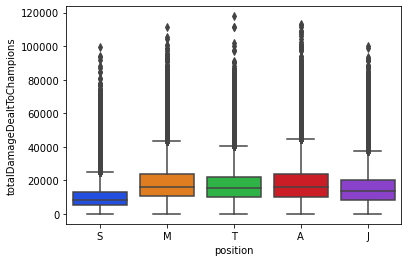

In [26]:
sns.boxplot(y = data ['totalDamageDealtToChampions'],
           x = data ['position'])

<AxesSubplot:xlabel='position', ylabel='totalDamageDealtToChampions'>

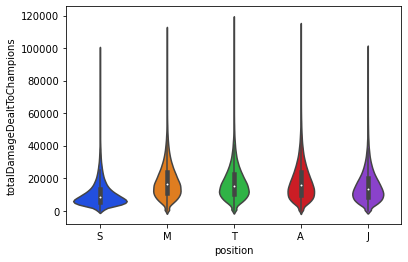

In [27]:
sns.violinplot(y = data ['totalDamageDealtToChampions'],
               x = data ['position'])

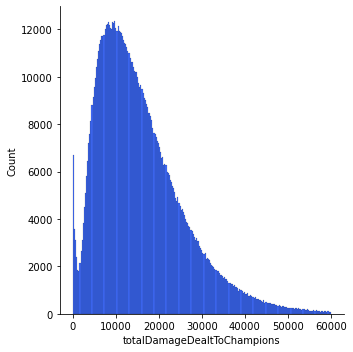

In [28]:
sns.displot(data[data['totalDamageDealtToChampions'] < 60000]
           ['totalDamageDealtToChampions'])

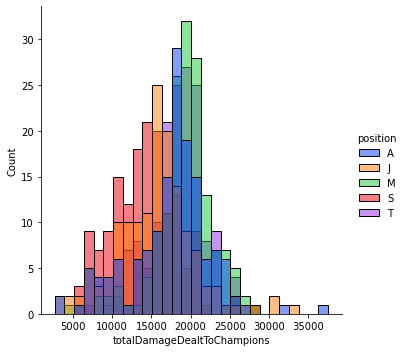

In [29]:
sns.displot(group_data, x = 'totalDamageDealtToChampions', hue = 'position')

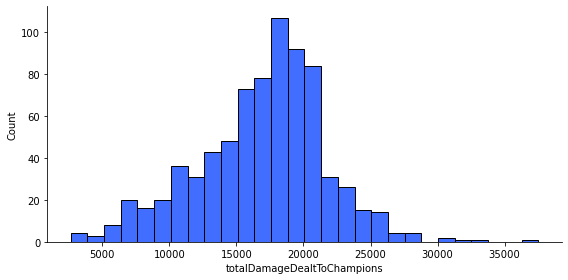

In [30]:
sns.displot(group_data, x = 'totalDamageDealtToChampions',
            height = 4, aspect = 2 )

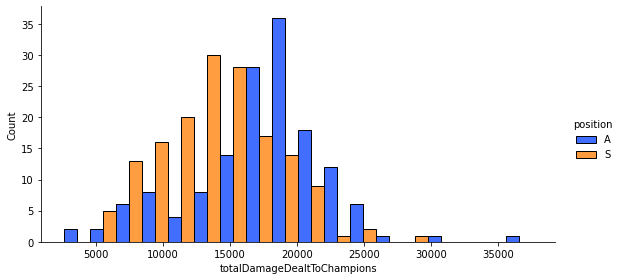

In [31]:
sns.displot(group_data[group_data['position'].isin(['A', 'S'])],
            x = 'totalDamageDealtToChampions', hue = 'position',
            multiple = 'dodge' , height = 4, aspect = 2)

In [32]:
champ_stats = pd.read_csv("champ_stats.csv")

In [33]:
champ_stats

,championId,championName,versionIndex,version,hp,hpperlevel,mp,mpperlevel,movespeed,armor,...,attackspeed,hp_18,mp_18,armor_18,spellblock_18,hpregen_18,mpregen_18,crit_18,attackdamage_18,attackspeed_18
0,1,Annie,11.17,11.17.394.4489,524.0,88,418.0,25.0,335,19,...,0.579,2020.0,843.0,87.00,38.50,14.85,21.60,0,94.71,0.7129
1,2,Olaf,11.17,11.17.394.4489,575.0,100,316.0,42.0,350,35,...,0.694,2275.0,1030.0,86.00,53.25,23.80,17.70,0,127.50,1.0125
2,3,Galio,11.17,11.17.394.4489,562.0,112,500.0,40.0,335,24,...,0.625,2466.0,1180.0,83.50,53.25,21.60,21.40,0,118.50,0.7844
3,4,TwistedFate,11.17,11.17.394.4489,534.0,94,333.0,39.0,330,21,...,0.651,2132.0,996.0,74.55,38.50,15.70,21.60,0,108.10,1.0074
4,5,XinZhao,11.17,11.17.394.4489,570.0,92,274.0,55.0,345,35,...,0.645,2134.0,1209.0,94.50,53.25,19.90,14.91,0,114.00,1.0288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,555,Pyke,11.17,11.17.394.4489,600.0,90,415.0,50.0,330,45,...,0.667,2130.0,1265.0,104.50,53.25,15.50,25.00,0,96.00,0.9505
152,777,Yone,11.17,11.17.394.4489,550.0,85,500.0,0.0,345,28,...,0.625,1995.0,500.0,85.80,53.25,20.25,0.00,0,94.00,0.9969
153,875,Sett,11.17,11.17.394.4489,600.0,93,0.0,0.0,340,33,...,0.625,2181.0,0.0,101.00,53.25,15.50,0.00,0,128.00,0.8109
154,876,Lillia,11.17,11.17.394.4489,580.0,90,410.0,50.0,330,22,...,0.625,2110.0,1260.0,90.00,44.75,20.25,27.65,0,113.70,0.9119


<AxesSubplot:xlabel='hp', ylabel='hp_18'>

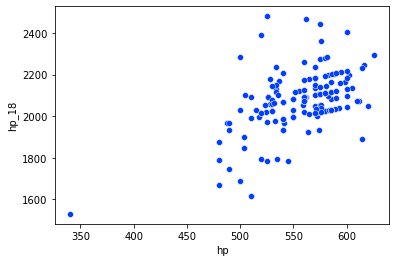

In [34]:
sns.scatterplot(data = champ_stats, x = 'hp' , y = 'hp_18')
# .set_xlim(450,640)

Text(129    343.0
Name: hp, dtype: float64, 129    1533.0
Name: hp_18, dtype: float64, 'Kled')

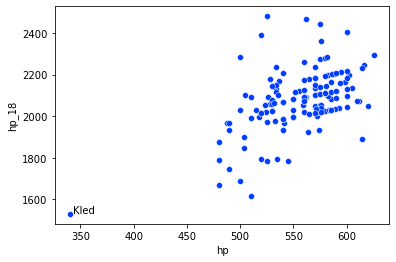

In [35]:
sns.scatterplot(data = champ_stats, x = 'hp' , y = 'hp_18')
plt.text(x = champ_stats[champ_stats['championName'] == 'Kled']['hp'] + 3,
        y = champ_stats[champ_stats['championName'] == 'Kled']['hp_18'] + 3,
        s = 'Kled')

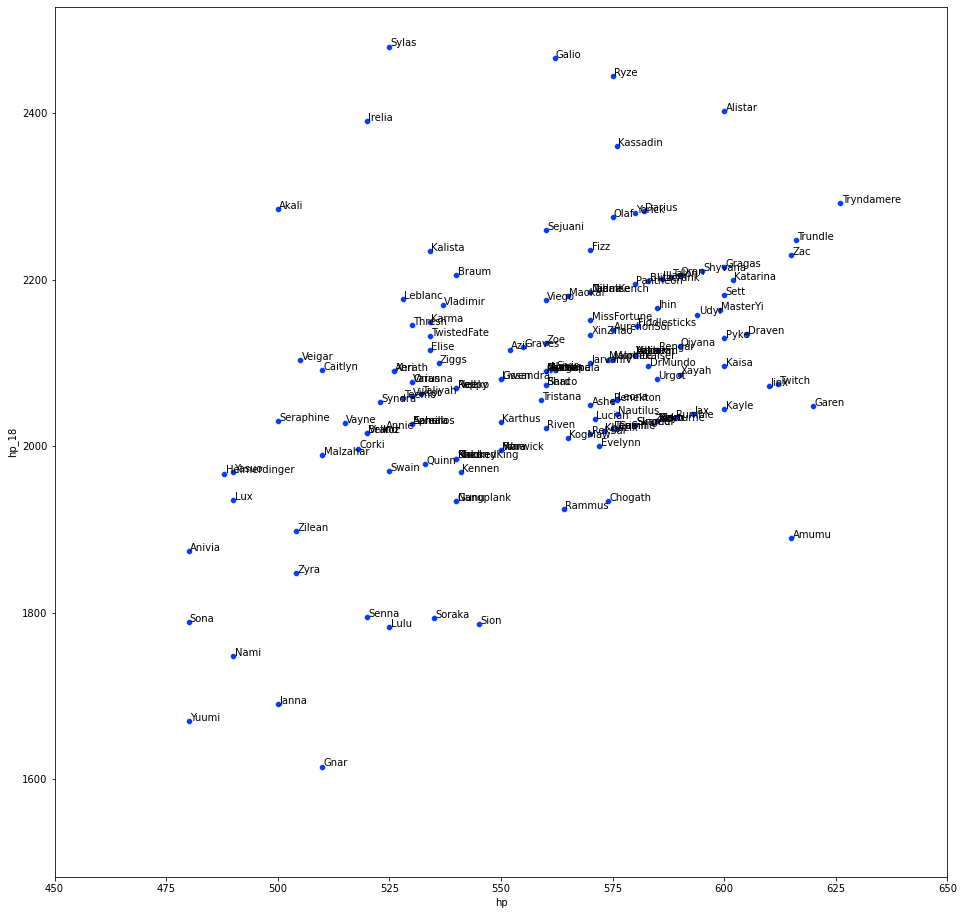

In [36]:
# 챔피언 능력치 별로 scatter
plt.figure(figsize = (16,16))
sns.scatterplot(data = champ_stats, x = 'hp', y = 'hp_18').set_xlim(450,650)
for i in range(champ_stats.shape[0]):
    if champ_stats.championName[i] == 'Kled':
        continue
    plt.text(x = champ_stats['hp'][i] + 0.3, 
             y = champ_stats['hp_18'][i] + 0.3, 
             s = champ_stats.championName[i])